## Attribute Information
Input features in order:
1) **CRIM:** per capita crime rate by town
2) **ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.
3) **INDUS:** proportion of non-retail business acres per town
4) **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) **NOX:** nitric oxides concentration (parts per 10 million) [parts/10M]
6) **RM:** average number of rooms per dwelling
7) **AGE:** proportion of owner-occupied units built prior to 1940
8) **DIS:** weighted distances to five Boston employment centres
9) **RAD:** index of accessibility to radial highways
10) **TAX:** full-value property-tax rate per $10,000 [$/10k]
11) **PTRATIO:** pupil-teacher ratio by town
12) **B:** The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) **LSTAT:** % lower status of the population

Output variable:
1) **MEDV:** Median value of owner-occupied homes in $1000's [k$]

### Data Source

https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

In [33]:
# Import dependencies 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

# For default view 
pd.set_option("display.max_columns", 75)

In [35]:
# Import data 
df = pd.read_csv("/home/western/Documents/Data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [38]:
# Numeric columns 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


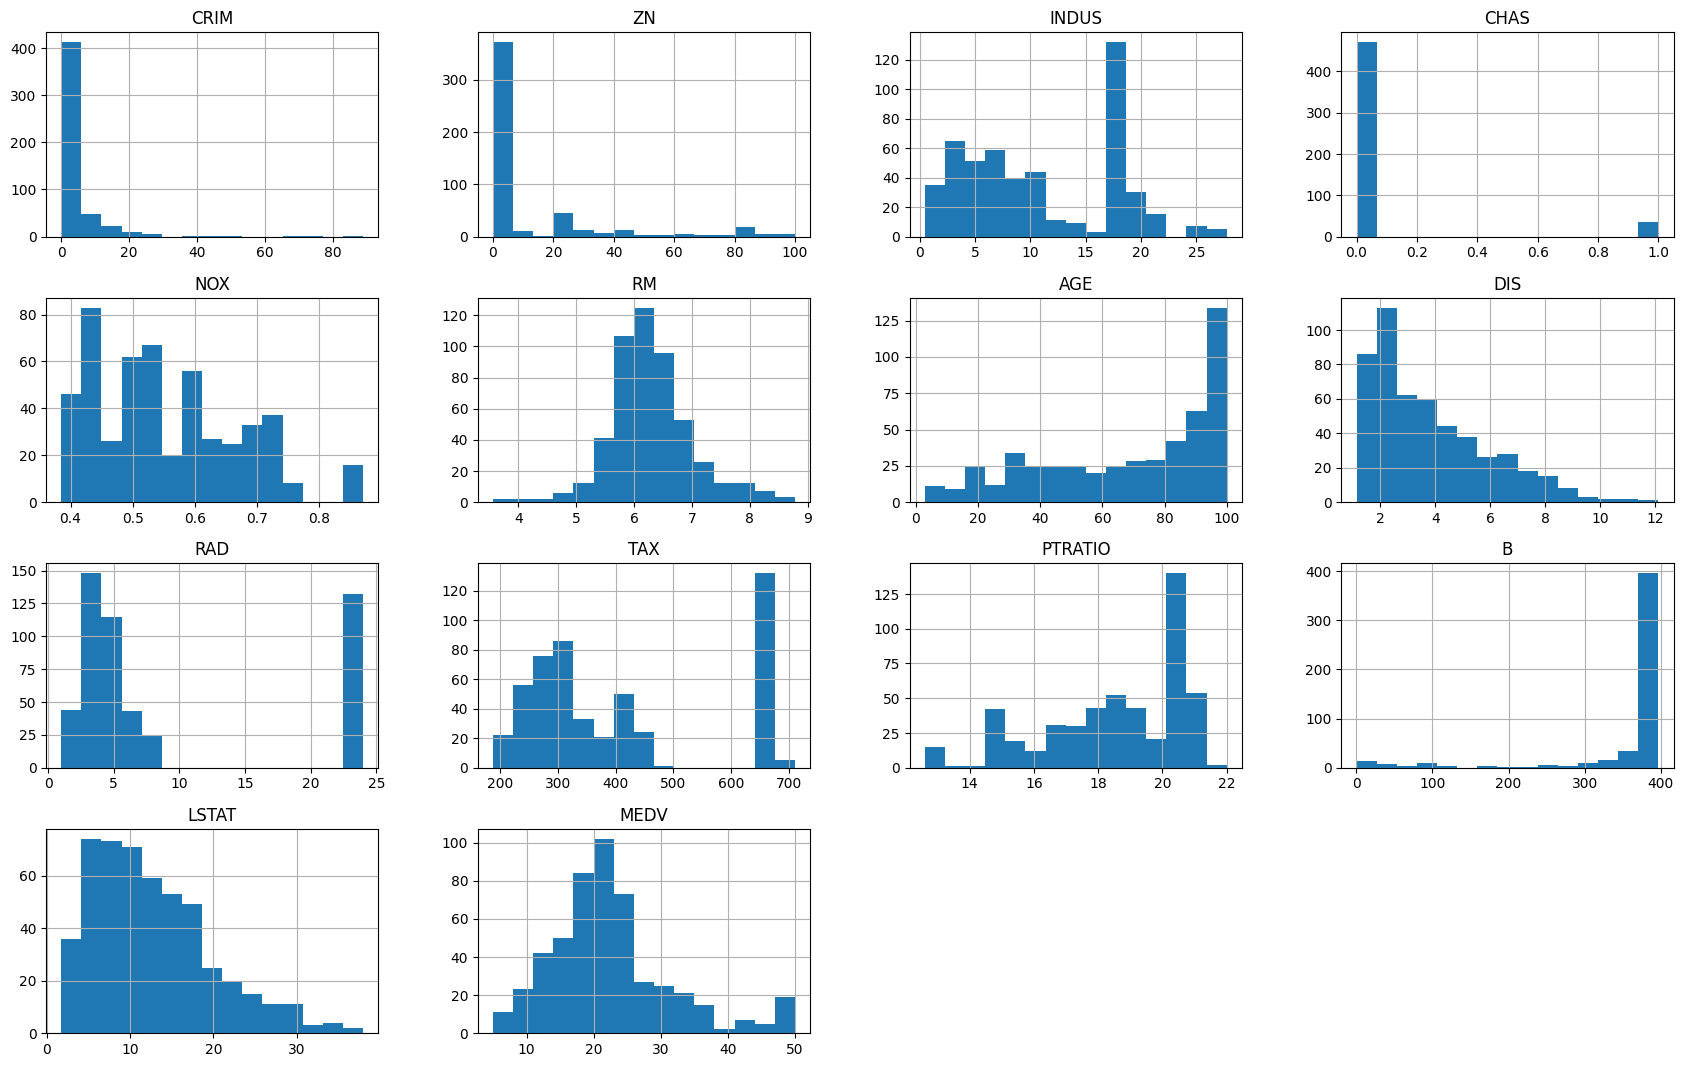

In [39]:
df.hist(bins=15, figsize=(21,13));

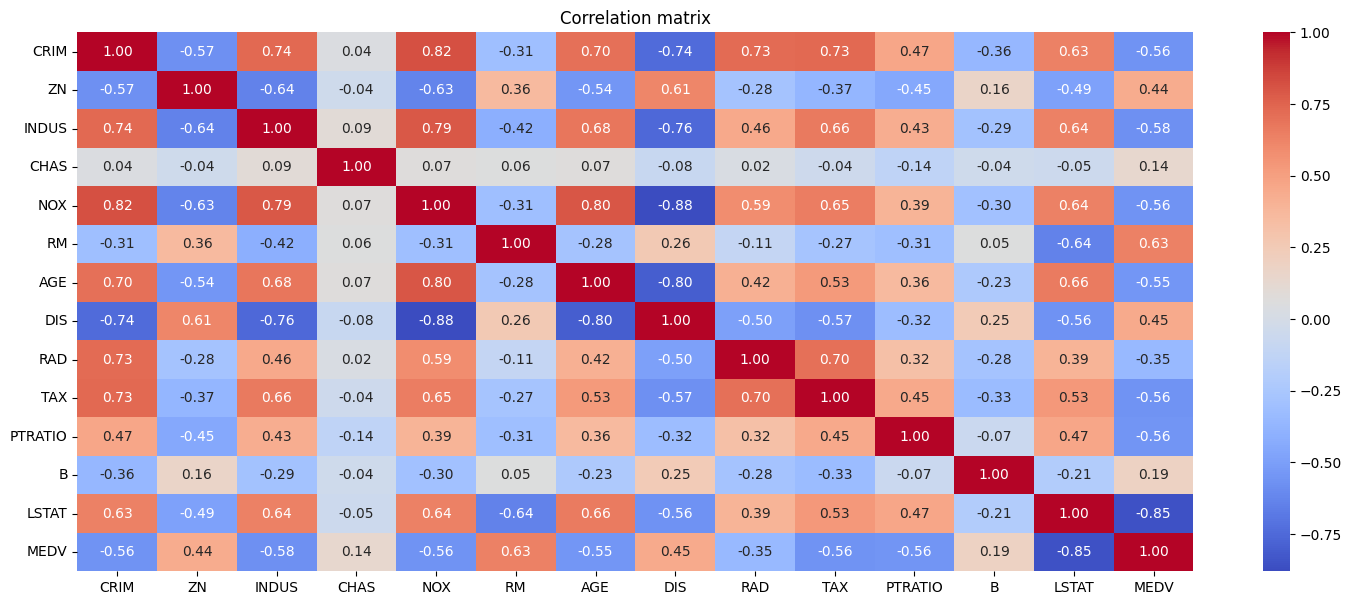

In [40]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix 
corr_matrix = df[numeric_columns].corr(method='spearman')

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# Modeling 
## Odinary Least Square

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



### Dependent and independent feature selection 

In [48]:
# Drop null values
df = df.dropna()

# Defining the dependent variables/features
X = df.drop(columns=['MEDV'])  # Features
y = df['MEDV']  # Target variable



In [49]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [57]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Split data to training and testing sets

In [60]:
# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [62]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [ ]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the specified columns in the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [64]:
X_train_scaled

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]], shape=(354, 13))

In [66]:
# Convert scaled data back to DataFrame with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# Reset the index of y_train to match X_train_scaled
y_train = y_train.reset_index(drop=True)
X_train_scaled = X_train_scaled.reset_index(drop=True)

In [68]:
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316
1,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663
2,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324
3,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.630274,-0.601625,1.207859,0.312760,-0.822422
4,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.687825,1.557294,0.852872,0.104124,0.803800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.397237,-0.505125,-0.371354,-0.281546,-0.319475,-0.681810,0.836171,-0.732385,-0.514369,-0.138570,1.163486,0.414371,0.878423
350,-0.381828,0.380752,-0.602272,-0.281546,-0.799639,-0.653963,-0.966462,0.312349,-0.746179,-1.106776,0.142897,0.333497,0.081504
351,-0.416046,3.038382,-1.316677,-0.281546,-1.048295,0.430702,-1.415310,2.156415,-0.630274,-0.763995,-0.567077,0.359879,-0.905493
352,0.926113,-0.505125,1.005500,-0.281546,1.566884,0.422348,0.933904,-0.773035,1.687825,1.557294,0.852872,-2.878413,1.527504


## Ordinary least squares

**1. What is the Intercept?**
In the general equation of a linear regression model:
>  $\hat{y} = β _o + β_1 x_1 + β_2 x_2 + .....+ β_n x_n$

- If no constant is added, the model assumes $β _o = 0$ which may lead to a biased model.

**2. Why Add a Constant?**
- Intercept Represents Baseline Value: Many real-world processes have a non-zero baseline that needs to be modeled.
- Better Model Fit: Without an intercept, the model forces the line to pass through the origin (0,0) which may lead to significant errors if the data does not support this assumption.


In [73]:
# Add a constant to the predictors (for statsmodels)
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model (Calculating coeficients)
linreg = sm.OLS(y_train, X_train_const).fit()


# Print the model summary with column names
print(linreg.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.96e-92
Time:                        23:50:47   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0158      0.258     89.379      0.0

## Analyzing Model Perfomance 

### **1. Model Fit and Performance**
- **R-squared: 0.772**
> 77.2% of the variation in the dependent variable (MEDV) is explained by the independent variables in the model.
- **Adjusted R-squared: 0.763**
> Explanation: Adjusted for the number of predictors; slightly lower than R-squared to penalize adding unnecessary variables.
- **F-statistic: 88.37 and Prob(F-statistic): 1.62e-100**
> The overall model is statistically significant, meaning at least one predictor has a significant relationship with MEDV.

### **2. Coefficients and Statistical Significance**
- Each row represents a predictor variable:
- P>|t| (p-value):
> Variables with p-values < 0.05 are statistically significant.
- **Significant predictors in this model:**

- **CRIM:** Coefficient = -0.0760 (p = 0.010) – A negative relationship with MEDV.

- **CHAS:** Coefficient = 0.0263 (p = 0.020) – A positive impact on MEDV.
- **RM:** Coefficient = 0.0437 (p = 0.004) – More rooms increase MEDV.

- **DIS:** Coefficient = -0.0628 (p = 0.009) – A negative impact on MEDV.

- **RAD:** Coefficient = 0.0809 (p = 0.001) – Positive relationship with MEDV.

- **PTRATIO, B, and LSTAT** are also significant.

### **3. Interpretation of Coefficients**
- **CRIM** (per capita crime rate): Higher crime is associated with a decrease in MEDV.

- **RM** (average number of rooms): An increase in the number of rooms positively affects house prices.

- **LSTAT** (lower status of the population): A higher LSTAT value decreases MEDV significantly.

### **4. Model Diagnostics**
- **Durbin-Watson: 2.011**

- Indicates no significant autocorrelation in residuals (values close to 2 are desirable).

- Condition Number: 8.15

- A relatively low condition number suggests minimal multicollinearity.

#### **5. Omnibus, Skew, Kurtosis, and Jarque-Bera**

- **Prob(Omnibus) and Prob(JB):**

- Low p-values indicate that residuals may not be normally distributed. This should be further investigated with residual plots.


## Recursive Feature Elimination 
- Recursive Feature Elimination is an iterative feature selection method that works by recursively removing features from the dataset and evaluating the performance of a model at each step. 
- It starts with all features and ranks them based on their importance or relevance to the target variable
- Removes the least important feature(s) and repeats the process until the desired model performance is reached.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression (creates a linear regression model to be used as the estimator)
linear_reg = LinearRegression()

# Initialize RFE with the Linear Regression model and desired number of features
# Uses linear regression model and specifies it will select the top 20 most important features.
rfe = RFE(estimator=linear_reg, n_features_to_select=20)

# Fit RFE on training data
rfe = rfe.fit(X_train_scaled, y_train)

# Get the mask of selected features
# rfe.support_ returns a boolean mask (True for selected features, False for unselected ones). 
# This mask identifies which features were selected as the top 20 important ones.
selected_features_mask = rfe.support_

# Display the selected features mask
print(selected_features_mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]


/home/western/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=20 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


### Identifying Important Features
- **rfe.support_** tells which features have been selected as important (marked as True).
- **rfe.ranking_** assigns a rank to each feature, where a rank of 1 means the feature is one of the most important for the model. 
- Higher ranks indicate less important features. This allows you to know which features contribute the most to the predictive power of the model.

In [15]:
# List features, their selection status, and their ranks
feature_selection = list(zip(X_train_scaled, rfe.support_, rfe.ranking_))

# Display the feature selection results
for feature, selected, rank in feature_selection:
    print(f"Feature: {feature}, Selected: {selected}, Rank: {rank}")


Feature: CRIM, Selected: True, Rank: 1
Feature: ZN, Selected: True, Rank: 1
Feature: INDUS, Selected: True, Rank: 1
Feature: CHAS, Selected: True, Rank: 1
Feature: NOX, Selected: True, Rank: 1
Feature: RM, Selected: True, Rank: 1
Feature: AGE, Selected: True, Rank: 1
Feature: DIS, Selected: True, Rank: 1
Feature: RAD, Selected: True, Rank: 1
Feature: TAX, Selected: True, Rank: 1
Feature: PTRATIO, Selected: True, Rank: 1
Feature: B, Selected: True, Rank: 1
Feature: LSTAT, Selected: True, Rank: 1


## Multicolinearlity with VIF
- Multicollinearity occurs when two or more independent variables (predictors) in a regression model are highly correlated with each other. 
-  It’s hard to know the true relationship between predictors and the target.

### Variance Inflation Factor (VIF)
- Is a statistical measure used to detect multicollinearity in a model. It quantifies how much the variance of a regression coefficient is inflated due to multicollinearity with other variables.

#### How VIF Helps Detect Multicollinearity
- VIF Thresholds:

> VIF = 1: No multicollinearity.

> VIF between 1 and 5: Moderate multicollinearity (acceptable in many cases).

> VIF > 5 or 10: High multicollinearity, and the corresponding variable might need to be removed or addressed.

Interpretation:

- A higher VIF means that the predictor has a strong linear relationship with other predictors.
> For example, if VIF for a variable is 15, it means its variance is 15 times larger due to multicollinearity with other variables 

#### Why VIF Matters
- Improves Model Stability: Reducing multicollinearity helps the model generalize better on new data.
- Improves Interpretability: Coefficients become more reliable when predictors are less correlated.


In [16]:
# Import the Variance Inflation Factor (VIF) function from statsmodels to assess multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF for each feature

# Create an empty DataFrame to store the VIF results.
vif_data = pd.DataFrame()

# Add a column to the DataFrame with the feature names from the scaled training dataset.
vif_data["Feature"] = X_train_scaled.columns

# Compute the VIF for each feature in the scaled training dataset.
# Use a list comprehension to iterate through all columns (features) in the dataset.
# `X_train_scaled.values` provides the array representation of the data for VIF calculations.
# `i` refers to the column index for which VIF is calculated.
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]



# Display the DataFrame containing each feature and its corresponding VIF value.
vif_data




,Feature,VIF
0,CRIM,1.731586
1,ZN,2.394452
2,INDUS,3.836487
3,CHAS,1.102642
4,NOX,4.627219
5,RM,1.913056
6,AGE,2.996110
7,DIS,3.971023
8,RAD,7.534681
9,TAX,8.879471


## Testing model on testing set 

In [174]:
# Add a constant to the scaled test predictors
X_test_sm = sm.add_constant(X_test_scaled)

# Making predictions on the test set
y_pred = linreg.predict(X_test_sm)

# Print the predictions (optional)
y_pred.head()


173    28.648960
274    36.495014
491    15.411193
72     25.403213
452    18.855280
dtype: float64

## Model Evaluation 

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Display the metrics
print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Adjusted R²: {adjusted_r2:.2f}")


Model Evaluation Metrics:
MAE: 3.16
MSE: 21.52
RMSE: 4.64
R²: 0.71
Adjusted R²: 0.68


### Predicted vs Actual 

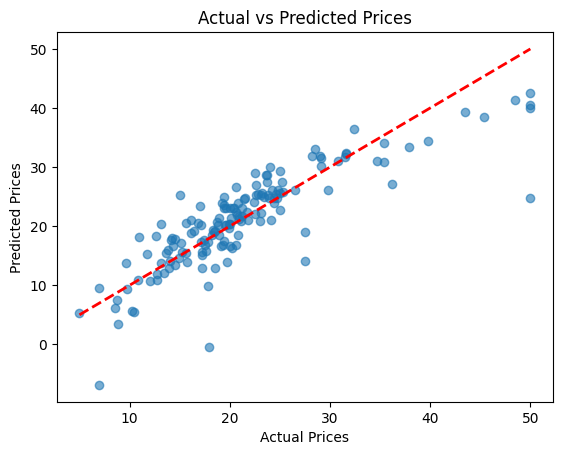

In [180]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

### Explanation of the Plot
**1. Tight Clustering Around the Red Line**
- The closer the points are to the red line, the better the model's predictions. most points are near the line, indicating a good fit between predicted and actual prices.

**2. Spread of Points**
- Some points are further from the red line, which represents prediction errors. The distance from the red line shows how far off a prediction is from the true value.
- Larger deviations indicate higher errors for those specific predictions.

**3. Overall Trend**
- The general alignment of points along the red line suggests that the model captures the relationship between the predictors and the target variable reasonably well.

### Residuals 

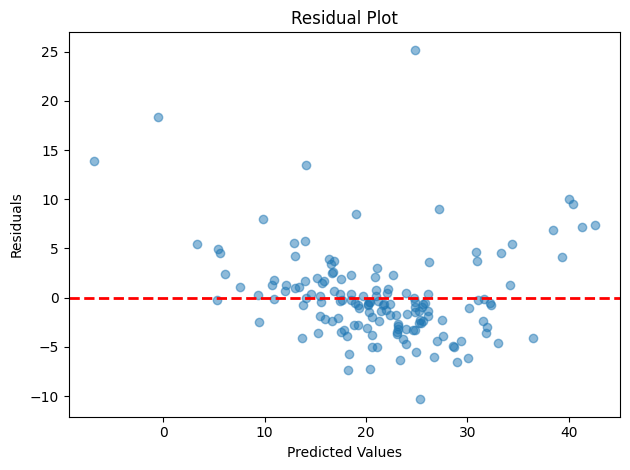

In [183]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

#### Observations
- The residuals in this plot appear to be randomly scattered around the red dashed line. This randomness indicates that the model is well-fitted, as there is no clear pattern or systematic bias in the residuals.

**1. No Systematic Patterns:** The residuals do not display any specific trend or curve, suggesting that the model captures the relationship between the predictors and the response variable effectively.

**2. Homoscedasticity:** The spread of residuals seems fairly consistent across all predicted values, implying that the variance of errors is constant.

**3. Potential Outliers:** A few points are relatively far from the red dashed line, which might indicate outliers or points where the model performs less well.

**4. Normality Assumption:** While the plot itself doesn't confirm normality of residuals, the lack of clear patterns supports the assumption that residuals may be normally distributed.


### Normality Assumption

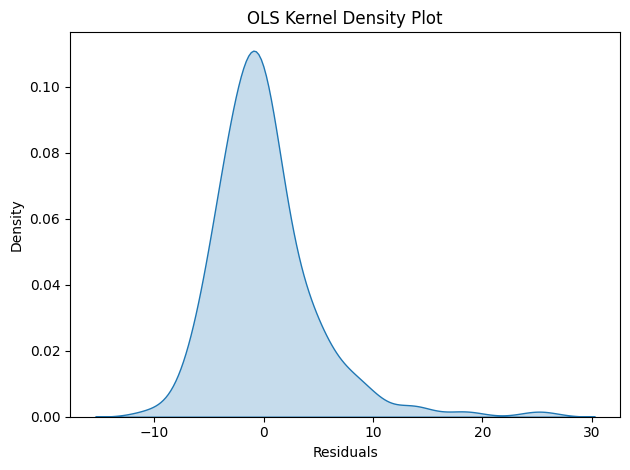

In [187]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('OLS Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

### Histogram plot for Normality 

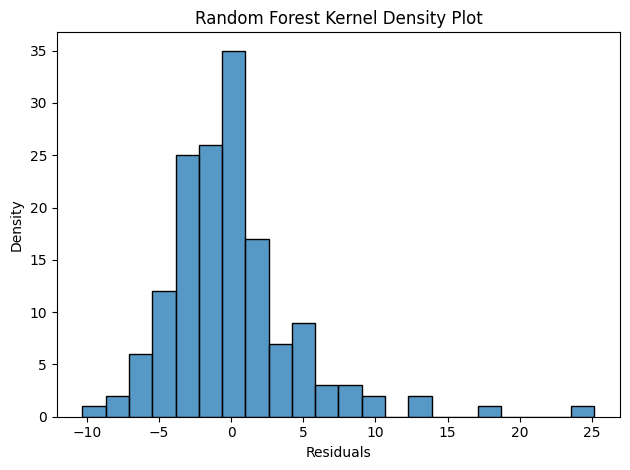

In [189]:
sns.histplot(residuals, fill=True)
plt.title('Random Forest Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

### Q-Q Plot 

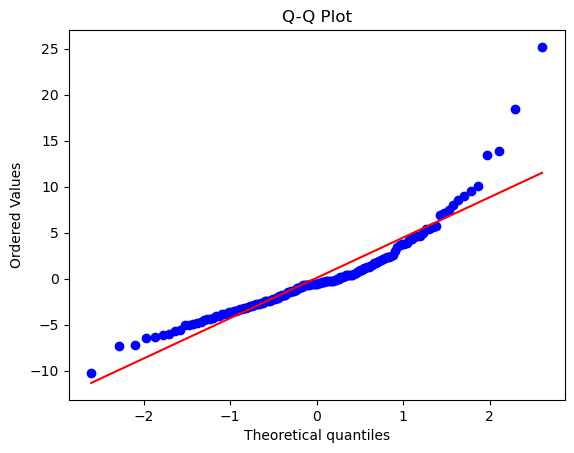

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

#### Analysis of the Plot:
**1. Points Alignment:**
- Most of the points lie close to the red line, indicating that the dataset roughly follows the theoretical distribution (likely normal).

**2. Deviations:**
- At the tails (extreme ends), there are deviations from the red line:
- Left Tail: The points are slightly below the line, suggesting that the lower tail of the sample data deviates from the normal distribution.
- Right Tail: The points are above the line, indicating that the upper tail is heavier than the theoretical distribution (evidence of potential outliers or a skewed distribution).

**3. Middle Section:**
The central points align well with the red line, indicating that the middle part of the data matches the normal distribution well.